In [42]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

mat_content = sio.loadmat( 'face(1).mat' )

face_data = mat_content[ 'X' ]

face_data_labels = mat_content[ 'l' ]

print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )

print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)
Face Data Labeled Shape: (2577, 520)


In [43]:
#Randomized Train test Split 42
train_label, test_label = train_test_split( faceDataLabeled.T, test_size = 0.3, random_state = 23 )
#Stratified Train test Split
# train_label, test_label = train_test_split( face_data.T, stratify = face_data_labels, test_size= 0.2 )

train_label = train_label.T.astype( 'float64' )
test_label  = test_label.T.astype( 'float64' )

print( 'Shape of Train Set {}'.format( train_label.shape ) )
print( 'Shape of Test Set {}'.format( test_label.shape ) )

Shape of Train Set (2577, 364)
Shape of Test Set (2577, 156)


[797. 858. 838. ... 519. 528. 512.]
[113.85714286 122.57142857 119.71428571 ...  74.14285714  75.42857143
  73.14285714]


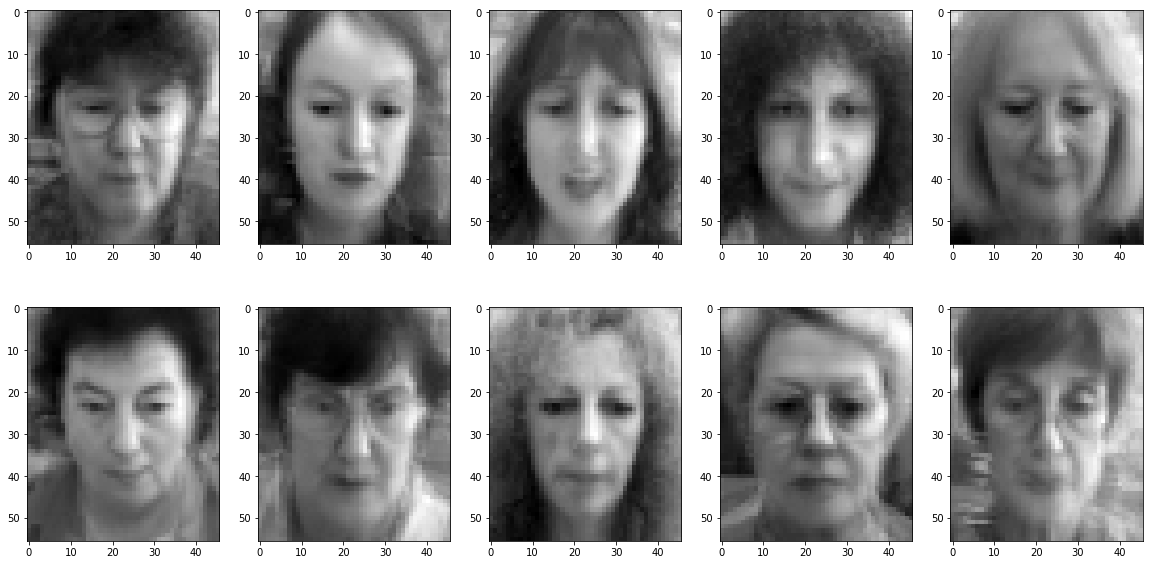

In [44]:
#Compute the Class Mean 
ClassMean = np.zeros((face_data.shape[0],52))
Num = np.zeros((52,1))
# print(ClassMean.shape)
# print(train_label.shape[1])
for i in range(train_label.shape[1]):
    ClassMean[:,train_label[2576,i].astype( 'int' )-1] = ClassMean[:,train_label[2576,i].astype( 'int' )-1] + train_label[: - 1,i]
    Num[train_label[2576,i].astype( 'int' )-1] = Num[train_label[2576,i].astype( 'int' )-1] + 1

print(ClassMean[:,1])

for i in range(ClassMean.shape[1]):
    ClassMean[:,i] = ClassMean[:,i] / Num[i]
 

print(ClassMean[:,1])

fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( ClassMean[:,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

(2576, 364)
(2576,)


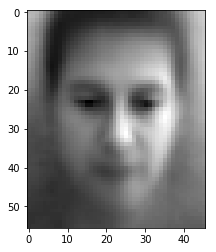

In [7]:
#Calculation of the mean face
print(train_label[: - 1].shape)
mean_face = np.mean( train_label[ : - 1 ], axis = 1) 
print(mean_face.shape)
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

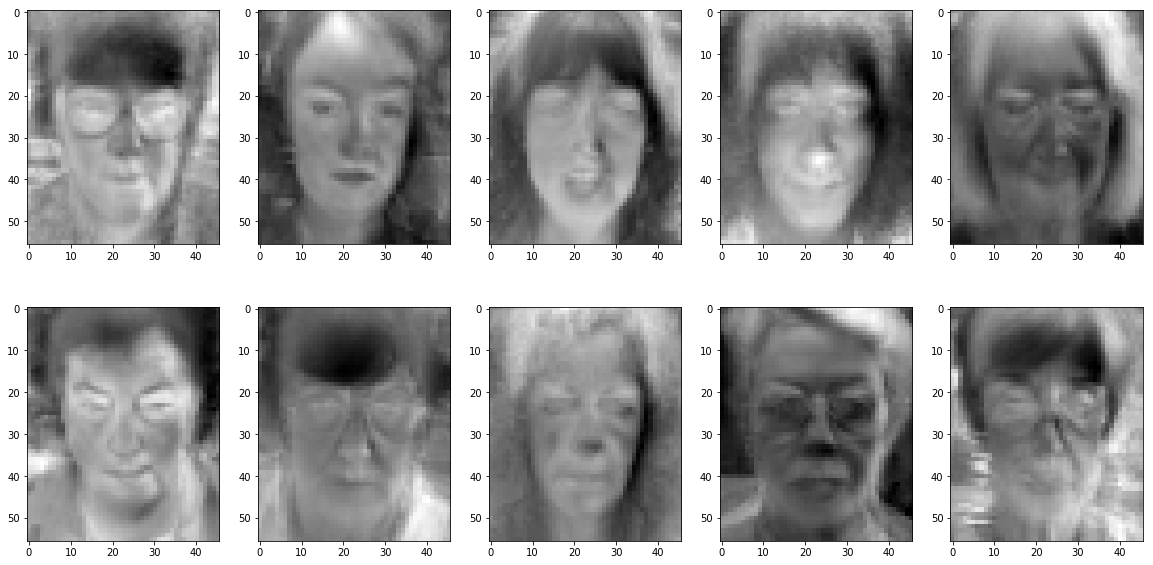

In [8]:
#Calculate Sb 
Sb = np.zeros((face_data.shape[0],52))
for i in range(Sb.shape[1]):
    Sb[:,i] = ClassMean[:,i] - mean_face
    
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( Sb[:,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

Sb = np.matmul(Sb,Sb.T)


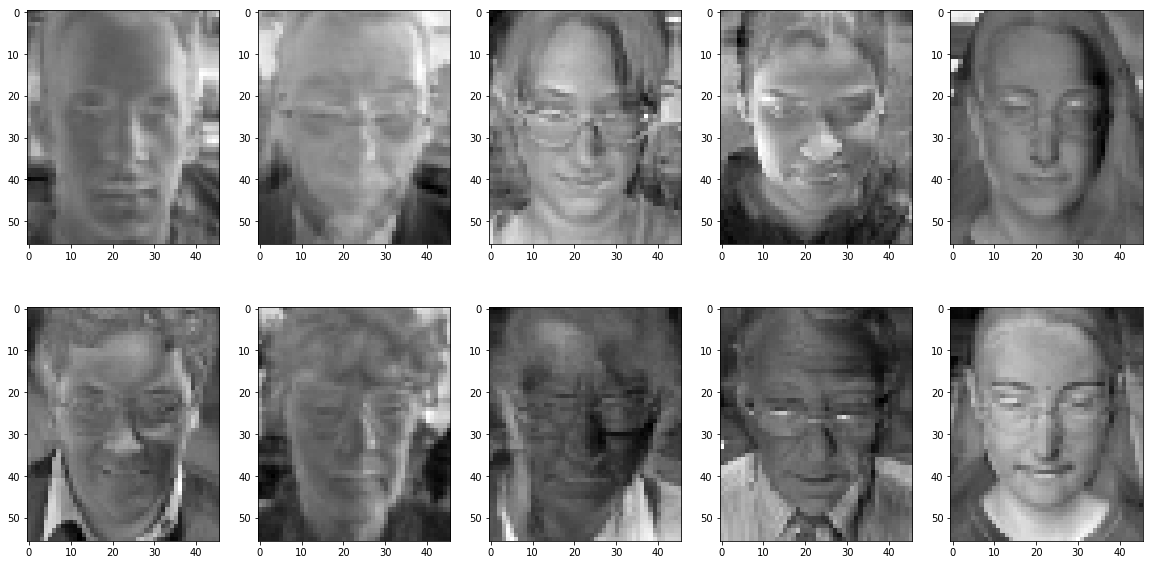

In [9]:
#Calculate Sw 
S = train_label
for i in range(S.shape[1]):
    S[: -1,i] = S[:-1,i] - ClassMean[:,S[-1 :,i].astype("int").item()-1]
    
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_face_img    = np.reshape( S[: -1,i], ( 46, 56 ) )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q2meanface.png")

#Compute the Sj
Sj = { k : [] for k in range( 1, 53 ) }
Num = np.zeros((52,1))

for i in range(S.shape[1]):
    Sj[S[2576,i].astype("int")].append(S[:,i])  
    Num[S[2576,i].astype("int")-1] = Num[S[2576,i].astype("int")-1] + 1

Sw = np.zeros((2576,2576))
for i in range(len(Sj)):
    
    cov = np.matmul(np.asarray(Sj[i+1])[:, : -1].T,np.asarray(Sj[i+1])[:, : -1])
    
    Sw = Sw + ( 1 / (Num[i]) ) * cov


# PCA

In [66]:
rank_sw = np.linalg.matrix_rank( Sw )

In [67]:
rank_sb = np.linalg.matrix_rank( Sb )

In [56]:
phi_mat = train_label[ : -1 ]

for i in range( phi_mat.shape[ 1 ] ):
    phi_mat.T[ i ] = phi_mat.T[ i ] - mean_face
    
print( 'Phi_Mat Shape {}'.format( phi_mat.shape ) )

Phi_Mat Shape (2576, 364)


In [57]:
A = phi_mat

S = 1 / A.shape[ 1 ] * np.dot( A, A.T )
print( 'Covariance Matrix Shape {}'.format( S.shape ) )

Covariance Matrix Shape (2576, 2576)


In [58]:
hd_eig_vals, hd_eig_vecs = np.linalg.eig( S )

In [60]:
hd_eig_pairs = [ ( np.abs( hd_eig_vals[ i ] ), hd_eig_vecs[ :, i ] ) for i in range( len( hd_eig_vals ) ) ]
hd_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in range( 10 ):
    print( hd_eig_pairs[ i ][ 0 ] )

87466236.4076941
608456.0482076813
463807.008864629
292265.9812752686
225244.01187408608
157288.921610057
130044.51192514825
110632.8952842877
97330.58152440217
87488.34217161048


In [129]:
# M = phi_mat.shape[ 1 ] # Take (Number Of Data Faces) M largest eigenvectors

M = 150

M_eig_vecs = []

for i in range( M ):
    M_eig_vecs.append( hd_eig_pairs[ i ][ 1 ] )
    
print( 'M Largest Eigen Pairs: {}'.format( len( M_eig_vecs ) ) )

M Largest Eigen Pairs: 150


In [130]:
M_eig_vecs = np.asarray( M_eig_vecs )

M_eig_vecs.shape

(150, 2576)

In [131]:
sbcalc = np.dot( M_eig_vecs, np.dot( Sb, M_eig_vecs.T ) )

sbcalc.shape

(150, 150)

In [132]:
swcalc = np.dot( M_eig_vecs, np.dot( Sw, M_eig_vecs.T ) )

swcalc.shape

(150, 150)

In [133]:
swinv = np.linalg.inv( swcalc )

swinv.shape

(150, 150)

In [134]:
something = np.dot( swinv, sbcalc )

In [135]:
lda_eig_val, lda_eig_vecs = np.linalg.eig( something )

In [136]:
lda_eig_vecs.shape

(150, 150)

In [137]:
M_lda = 30

lda_eig_pairs = [ ( np.abs( lda_eig_val[ i ] ), lda_eig_vecs[ :, i ] ) for i in range( len( lda_eig_val ) ) ]
lda_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

M_lda_vecs = []

for i in range( M_lda ):
    print( lda_eig_pairs[ i ][ 0 ] )
    M_lda_vecs.append( lda_eig_pairs[ i ][ 1 ] )
    
    

27.640918418801462
18.921970235874507
15.130265453410107
13.309014271155217
11.627309078761376
10.976164823169471
9.979723450201627
8.907879445281988
7.871155837333885
7.399625386282485
6.559752059544687
5.913928849198262
5.375818839514911
5.245830063149567
4.891358835562231
4.523174072801074
4.436423022180321
4.149735088056081
4.042950169528647
3.6391173622141193
3.348602863416063
3.294625938169714
2.8754443970905044
2.7550992537111405
2.5503427100139016
2.426146271242949
2.249835663517437
2.1234013755051775
2.119957578890182
1.7181588120903188


In [138]:
M_lda_vecs = np.asarray( M_lda_vecs )

M_lda_vecs.shape

(30, 150)

In [139]:
wpcawlda = np.dot( M_lda_vecs, M_eig_vecs)

wpcawlda.shape

wpcawlda[ 0 ].real

array([ 0.03623523,  0.02010167,  0.00312086, ..., -0.00710109,
       -0.01278675, -0.0089349 ])

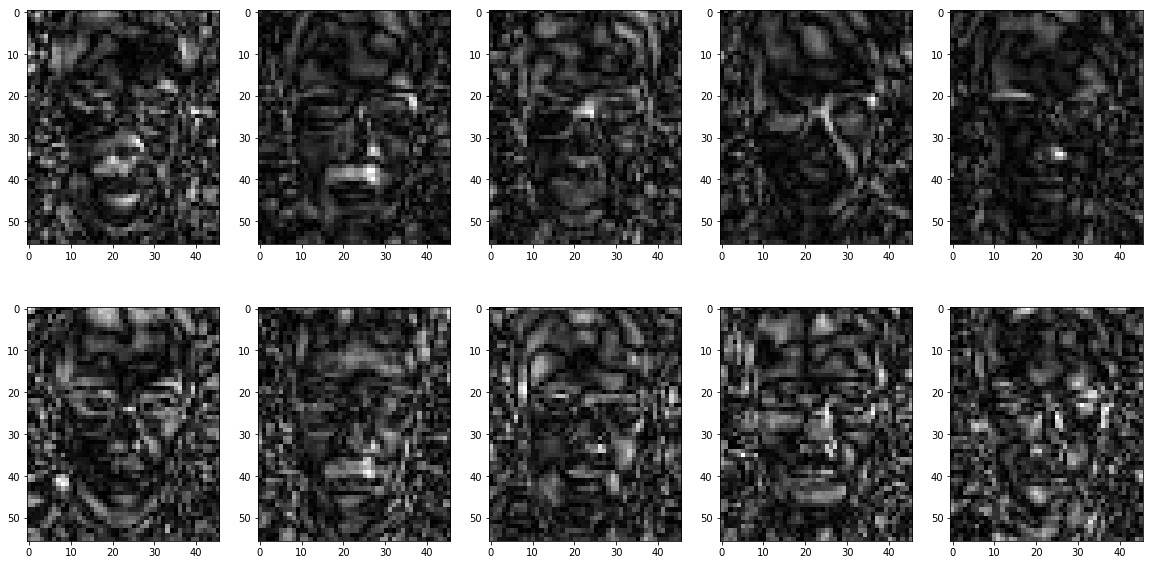

In [141]:
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    test_img = np.reshape(np.abs( wpcawlda[ i ].real ),(46,56))
    fig.add_subplot( 2, 5, i + 1 )
    plt.imshow( test_img.T, cmap = 'gist_gray')

In [116]:
wpcawlda.shape

(30, 2576)